# Word Embedding - 실습

### 정수 인코딩

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [4]:
from collections import OrderedDict

text = "'평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

tokens = [x for x in text.split(' ')]
print("Tokens: ",tokens)

unique = list(set(tokens)) # 순서가 바뀜
print("Unique - set 사용시: ", unique)
unique = list(OrderedDict.fromkeys(tokens).keys())
print("Unique list: ", unique) # 순서가 유지.

token2idx = {}
for i in range(len(unique)):
  token2idx[unique[i]]=i

encode = [token2idx[x] for x in tokens]
print('Encoded Sentence: ', encoded)

vocab = {}
for key, token in enumerate(unique):
  vocab[key] =token
print('vocab: ', vocab)

Tokens:  ["'평생", '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라']
Unique - set 사용시:  ['꾸어라.', '것처럼', '죽을', '내일', "'평생", '살', '그리고', '살아라', '오늘을', '꿈을']
Unique list:  ["'평생", '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '오늘을', '살아라']
Encoded Sentence:  [[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]]
vocab:  {0: "'평생", 1: '살', 2: '것처럼', 3: '꿈을', 4: '꾸어라.', 5: '그리고', 6: '내일', 7: '죽을', 8: '오늘을', 9: '살아라'}


#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = "'평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

t = Tokenizer()
t.fit_on_texts([text])
print('Word Index: ', t.word_index) # 순서 유지 안됨

encoded = t.texts_to_sequences([text])[0]
print('Encoded Sentence: ', encoded)


Word Index:  {'것처럼': 1, "'평생": 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]
Encoded Sentence:  [2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


### 원 핫 인코딩(One-Hot Encoding)

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* 원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환   

In [15]:
import numpy as np

one_hot = []
for i in range(len(encoded)):
  temp = []
  for j in range(max(encoded)):
    if j==(encoded[i]-1):
      temp.append(1)
    else:
      temp.append(0)
  one_hot.append(temp)

np.array(one_hot)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공 

In [16]:
from tensorflow.keras.utils import to_categorical

one_hot = to_categorical(encoded)
print('Encoded Sentence: ', one_hot)


Encoded Sentence:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

### 데이터 로드

In [18]:
num_words = 1000

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = num_words)
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,) (25000,) (25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [19]:
print(x_train[0:3])
print(y_train[0:3])

[list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207,

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
max_len = 100
pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [22]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

218
100


In [23]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  2  33   6  22  12 215  28  77  52   5  14 407  16  82   2   8   4 107
 117   2  15 256   4   2   7   2   5 723  36  71  43 530

### 모델 구성

In [24]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim = 32, input_length = max_len ))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           32000     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3201      
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [26]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 0.5555 - acc: 0.7186 - val_loss: 0.4143 - val_acc: 0.8136
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3723 - acc: 0.8351 - val_loss: 0.3813 - val_acc: 0.8220
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3365 - acc: 0.8551 - val_loss: 0.3857 - val_acc: 0.8242
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3081 - acc: 0.8716 - val_loss: 0.3863 - val_acc: 0.8252
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2781 - acc: 0.8866 - val_loss: 0.4046 - val_acc: 0.8192
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2468 - acc: 0.9040 - val_loss: 0.4074 - val_acc: 0.8206
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2139 - acc: 0.9204 - val_loss: 0.4272 - val_acc: 0.8122
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

### 시각화

In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [28]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

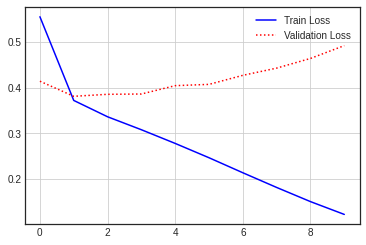

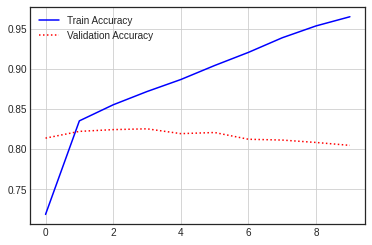

In [30]:
plt.plot(hist_dict['loss'],'b-',label='Train Loss')
plt.plot(hist_dict['val_loss'],'r:',label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'],'b-',label='Train Accuracy')
plt.plot(hist_dict['val_acc'],'r:',label='Validation Accuracy')
plt.legend()
plt.grid()

### 모델 평가

In [31]:
model.evaluate(pad_x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.4891 - acc: 0.8030


[0.48908713459968567, 0.8029599785804749]

### 단어의 수를 늘린 후 재학습

In [35]:
num_words=2000
max_len=400

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words = num_words)
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

pad_x_train_2 = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test_2 = pad_sequences(x_test, maxlen=max_len, padding='pre')


(25000,) (25000,) (25000,) (25000,)


데이터 확인

In [34]:
print(x_train[0])
print(pad_x_train_2[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    

In [36]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim = 32, input_length = max_len ))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           64000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 12801     
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [46]:
history2 = model.fit(pad_x_train_2, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 1.3711e-04 - acc: 0.9999 - val_loss: 1.3341 - val_acc: 0.8326
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 1.5657e-04 - acc: 0.9999 - val_loss: 1.3882 - val_acc: 0.8328
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 6.0741e-05 - acc: 0.9999 - val_loss: 1.4422 - val_acc: 0.8310
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 6.5807e-05 - acc: 0.9999 - val_loss: 1.4884 - val_acc: 0.8322
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 9.4701e-05 - acc: 0.9999 - val_loss: 1.5243 - val_acc: 0.8306
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 1.9776e-05 - acc: 1.0000 - val_loss: 1.5504 - val_acc: 0.8312
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 2.7350e-05 - acc: 1.0000 - val_loss: 1.5723 - val_acc: 0.8318
Epoch 8/10
625/625 [============================

### 시각화

In [43]:
hist_dict2 = history2.history
hist_dict2.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

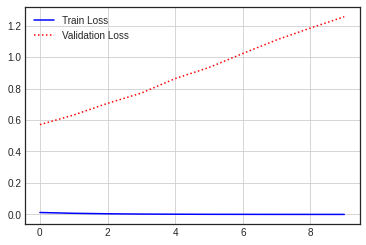

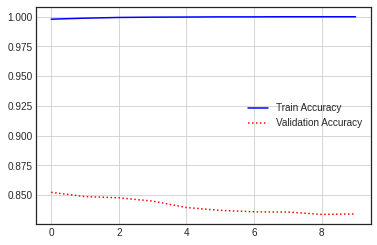

In [45]:
plt.plot(hist_dict2['loss'],'b-',label='Train Loss')
plt.plot(hist_dict2['val_loss'],'r:',label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict2['acc'],'b-',label='Train Accuracy')
plt.plot(hist_dict2['val_acc'],'r:',label='Validation Accuracy')
plt.legend()
plt.grid()

### 모델 평가

In [47]:
model.evaluate(pad_x_test_2,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 1.5055 - acc: 0.8309


[1.5054765939712524, 0.8309199810028076]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

<BR><BR>

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

## T-SNE

* T-SNE(t-Stochastic Neighbor Embedding)은 고차원의 벡터들의 구조를 보존하며 저차원으로 사상하는 차원 축소 알고리즘
* 단어 임베딩에서도 생성된 고차원 벡터들을 시각화하기 위해 이 T-SNE 알고리즘을 많이 이용

* t-sne는 가장 먼저 원 공간의 데이터 유사도 $p_{ij}$와 임베딩 공간의 데이터 유사도 $q_{ij}$를 정의
* $x_i$에서 $x_j$ 간의 유사도 $p_{j|i}$ 는 다음과 같이 정의

$$ p_{j|i} = \frac {exp({-|x_i - x_j|}^2 / 2  \sigma^2_i)}{\sum_{k \neq i}exp({-|x_i - x_k|}^2 / 2  \sigma^2_i)} $$

* 설명하자면 $p_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 가중치 $\sigma^2_i$로 나눈 후, 이를 negative exponential을 취해 모든 점 간의 거리의 합과 나누어준 값으로 두 점 간의 거리가 가까울 수록 큰 값을 가짐

* 또한 임베딩 공간에서의 $y_i$에서 $y_j$ 간의 유사도 $q_{j|i}$ 는 다음과 같이 정의

$$ q_{j|i} = \frac {(1 + |y_i-y_j|^2)^{-1}}{\sum_{k \neq l}(1 + |y_i-y_j|^2)^{-1}} $$

* $q_{j|i}$는 $x_i$와 $x_j$ 간의 거리에서 1을 더해준 후 역수를 취한 값과 전체 합산 값과 나누어 유사도를 정의

* T-SNE의 학습은 $p_{j|i}$와 비슷해지도록 $q_{j|i}$의 위치를 조정하는 것이라고 할 수 있음



## 데이터 준비

In [50]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
documents = dataset.data

print(len(documents))
documents[2]

11314


"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n   If you want to continue this think tank charade of yours, your\nfixation on Israel must stop.  You might have to start asking the\nsame sort of questions of Arab countries as well.  You realize it\nwould not work, as the Arab countries' treatment of Jews over the\nlast several decades is so bad that your fixation on Israel would\nbegin to look like the biased attack that it is.\n\n   Everyone in this group recognizes that your stupid 'Center for\nPolicy Research' is nothing more than a fancy name for some bigot\nwho hates Israel."

In [51]:
documents[3]

'Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT\'s last product in this area (a) was priced over\n$1000, as I suspect \'clipper\' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed\'s posture,\nClipper seems to be "more of the same", rather than a new direction.\n   Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn\'t have one anyway.  Am I missing something?\n   The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc.  That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the \'underground\' stature

In [55]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  text = re.sub(pattern,'',d)
  return d

def clean_stopword(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def tokenize(d):
  return word_tokenize(d)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [56]:
import pandas as pd

news_df = pd.DataFrame({'article':documents})
len(news_df)

11314

In [57]:
news_df.replace("", float("NaN"), inplace = True)
news_df.dropna(inplace=True)
print(len(news_df))

11096


In [58]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [59]:
news_df['article'] = news_df['article'].apply(clean_stopword)
news_df['article']

0        well sure story seem biased. what disagree sta...
1        yeah, expect people read faq, etc. actually ac...
2        although realize principle strongest points, w...
3        notwithstanding legitimate fuss proposal, much...
4        well, change scoring playoff pool. unfortunate...
                               ...                        
11309    danny rubenstein, israeli journalist, speaking...
11310                                                     
11311    agree. home runs clemens always memorable. kin...
11312    used deskjet orange micros grappler system6.0....
11313    ^^^^^^ argument murphy. scared hell came last ...
Name: article, Length: 11096, dtype: object

In [61]:
tokenized_news = news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()

In [63]:
import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis = 0)
print(len(news_texts))

10991


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## Gensim을 이용한 Word2Vec

### CBOW

In [81]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=news_texts, window=4,
                 size = 100, min_count = 5, workers = 4, sg = 0) # sg = 0 for CBOW, sg = 1 for Skip-Gram

In [82]:
model.wv.similarity('man','woman')

0.8671648

In [83]:
model.most_similar(positive=['soldiers'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('killed', 0.9815230369567871),
 ('villages', 0.9714648723602295),
 ('turks', 0.9597580432891846),
 ('murdered', 0.9519166350364685),
 ('genocide', 0.9512169361114502),
 ('civilians', 0.94865483045578),
 ('azerbaijani', 0.9464004039764404),
 ('kurds', 0.9461163878440857),
 ('land', 0.9403620958328247),
 ('lived', 0.9398808479309082)]

In [87]:
model.most_similar(positive=['man','soldiers'], negative=['woman'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('jew', 0.91199791431427),
 ('homosexual', 0.9064624309539795),
 ('men', 0.9058665633201599),
 ('germans', 0.9028646349906921),
 ('followers', 0.9011059999465942),
 ('israelis', 0.8972489833831787),
 ('claimed', 0.8943643569946289),
 ('died', 0.8906267285346985),
 ('jews', 0.8904616236686707),
 ('children', 0.8860495090484619)]

### Skip-gram

In [88]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=news_texts, window=4,
                 size = 100, min_count = 5, workers = 4, sg = 1) # sg = 0 for CBOW, sg = 1 for Skip-Gram

In [89]:
model.wv.similarity('man','woman')

0.8341181

In [90]:
model.most_similar(positive=['soldiers'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('villages', 0.9326990842819214),
 ('wounded', 0.9201443195343018),
 ('troops', 0.9187761545181274),
 ('azeri', 0.9180687665939331),
 ('burned', 0.9161362051963806),
 ('kurds', 0.9142764806747437),
 ('azerbaijanis', 0.9116508960723877),
 ('corpses', 0.9068738222122192),
 ('fleeing', 0.9066684246063232),
 ('survivors', 0.9057278037071228)]

In [93]:
model.most_similar(positive=['man','soldiers'], negative=['woman'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('arafat', 0.8446364402770996),
 ('murders', 0.8435589075088501),
 ('israelis', 0.8416101932525635),
 ('babies', 0.8331196308135986),
 ('raping', 0.8309923410415649),
 ('neighbours', 0.8299866914749146),
 ('fighters', 0.8249802589416504),
 ('civilians', 0.8246235847473145),
 ('retaliation', 0.8212488293647766),
 ('senseless', 0.8191609382629395)]

### 임베딩 벡터 시각화

In [94]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('news_w2v')

* metadata.tsv와 tensor.tsv 데이터 생성

In [95]:
!python -m gensim.scripts.word2vec2tensor -i news_w2v -o news_w2v

2021-09-09 05:48:42,615 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py -i news_w2v -o news_w2v
2021-09-09 05:48:42,615 - utils_any2vec - INFO - loading projection weights from news_w2v
2021-09-09 05:48:44,503 - utils_any2vec - INFO - loaded (22174, 100) matrix from news_w2v
2021-09-09 05:48:46,033 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2021-09-09 05:48:46,033 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2021-09-09 05:48:46,035 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [97]:
!ls

from google.colab import files
files.download('news_w2v_metadata.tsv')
files.download('news_w2v_tensor.tsv')

news_w2v  news_w2v_metadata.tsv  news_w2v_tensor.tsv  sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Embedding Projector: https://projector.tensorflow.org/